# Pre-Process MIMIC-CXR Dataset

In [1]:
from fastai.basics import *
path = Path('/home/jupyter/data/mimic-cxr')

In [2]:
df = pd.read_csv(path/'mimic_cxr_mix_split.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377110 entries, 0 to 377109
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   dicom_id                    377110 non-null  object 
 1   subject_id                  377110 non-null  int64  
 2   study_id                    377110 non-null  int64  
 3   ViewPosition                361341 non-null  object 
 4   Procedure                   377110 non-null  object 
 5   View                        360613 non-null  object 
 6   Orientation                 335944 non-null  object 
 7   path                        377110 non-null  object 
 8   reports                     360553 non-null  object 
 9   Atelectasis                 82830 non-null   float64
 10  Cardiomegaly                97781 non-null   float64
 11  Consolidation               35377 non-null   float64
 12  Edema                       96892 non-null   float64
 13  Enlarged Cardi

In [3]:
# replace missing (NaN) with -2
df = df.replace(to_replace = np.nan, value =-2.0)
# from 4 lables to 2 (positive and all others)
df = df.replace(to_replace =[-1.0, -2.0], value =0.0)
# using dictionary to convert specific columns from float64 to int64 for one hot ecoding
convert_dict = {'Atelectasis': int, 
                'Cardiomegaly': int,
                'Consolidation': int,
                'Edema': int,
                'Enlarged Cardiomediastinum': int,
                'Fracture': int,
                'Lung Lesion': int,
                'Lung Opacity': int,
                'No Finding': int,
                'Pleural Effusion': int,
                'Pleural Other': int,
                'Pneumonia': int,
                'Pneumothorax': int,
                'Support Devices': int
               } 
# add a column to split dataset 
df["is_valid"] = ""
df['is_valid'] = np.where(df['split']== "train", False, True)
df = df.astype(convert_dict) 
# drop rows where all labels are negative 
df = df.drop(df[((df['Atelectasis'] == 0) & (df['Cardiomegaly'] == 0) &  (df['Consolidation'] == 0)
                    & (df['Edema'] == 0) &  (df['Enlarged Cardiomediastinum'] == 0) & (df['Fracture'] == 0) 
                    & (df['Lung Lesion'] == 0) & (df['Lung Opacity'] == 0) & (df['No Finding'] == 0) 
                    & (df['Pleural Effusion'] == 0) & (df['Pleural Other'] == 0) & (df['Pneumonia'] == 0) 
                    & (df['Pneumothorax'] == 0) & (df['Support Devices'] == 0))].index)
# drop unused columns
df = df.drop(["subject_id", "study_id", "ViewPosition", "Procedure", "View", 
              "Orientation", "path", "split"], axis=1)
# drop empty reports
df = df.dropna(subset = ["reports"])
# drop duplicate reports 
df = df.drop_duplicates(subset = ["reports"])
# save labels dataframe
df.to_csv(path/"labels.csv", index=False, encoding='utf-8-sig')
df_labels = pd.read_csv(path/'labels.csv')
df_labels.info()
print (df['is_valid'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156790 entries, 0 to 156789
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   dicom_id                    156790 non-null  object
 1   reports                     156790 non-null  object
 2   Atelectasis                 156790 non-null  int64 
 3   Cardiomegaly                156790 non-null  int64 
 4   Consolidation               156790 non-null  int64 
 5   Edema                       156790 non-null  int64 
 6   Enlarged Cardiomediastinum  156790 non-null  int64 
 7   Fracture                    156790 non-null  int64 
 8   Lung Lesion                 156790 non-null  int64 
 9   Lung Opacity                156790 non-null  int64 
 10  No Finding                  156790 non-null  int64 
 11  Pleural Effusion            156790 non-null  int64 
 12  Pleural Other               156790 non-null  int64 
 13  Pneumonia                   1

# 1. df for language model 

In [4]:
# drop unused columns
df_lm = df.drop(["Atelectasis", "Cardiomegaly", "Consolidation", 
                 "Edema", "Enlarged Cardiomediastinum", "Fracture", 
                 "Lung Lesion", "Lung Opacity", "No Finding", 
                 "Pleural Effusion", "Pleural Other", "Pneumonia", 
                 "Pneumothorax", "Support Devices", "is_valid"], axis=1)
df_lm.to_csv(path/'lm.csv', index=False, encoding='utf-8-sig')
df_lm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156790 entries, 0 to 377109
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   dicom_id  156790 non-null  object
 1   reports   156790 non-null  object
dtypes: object(2)
memory usage: 3.6+ MB


# 2. df for train & test

## df_train

In [5]:
# drop unused columns
df_train = df_labels[df_labels.is_valid == False]
df_train.to_csv(path/"train.csv", index=False, encoding='utf-8-sig')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152855 entries, 0 to 156789
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   dicom_id                    152855 non-null  object
 1   reports                     152855 non-null  object
 2   Atelectasis                 152855 non-null  int64 
 3   Cardiomegaly                152855 non-null  int64 
 4   Consolidation               152855 non-null  int64 
 5   Edema                       152855 non-null  int64 
 6   Enlarged Cardiomediastinum  152855 non-null  int64 
 7   Fracture                    152855 non-null  int64 
 8   Lung Lesion                 152855 non-null  int64 
 9   Lung Opacity                152855 non-null  int64 
 10  No Finding                  152855 non-null  int64 
 11  Pleural Effusion            152855 non-null  int64 
 12  Pleural Other               152855 non-null  int64 
 13  Pneumonia                   1

# df_test

In [6]:
# drop unused columns
df_test = df_labels[df_labels.is_valid == True]
df_test.to_csv(path/"test.csv", index=False, encoding='utf-8-sig')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3935 entries, 128 to 156570
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   dicom_id                    3935 non-null   object
 1   reports                     3935 non-null   object
 2   Atelectasis                 3935 non-null   int64 
 3   Cardiomegaly                3935 non-null   int64 
 4   Consolidation               3935 non-null   int64 
 5   Edema                       3935 non-null   int64 
 6   Enlarged Cardiomediastinum  3935 non-null   int64 
 7   Fracture                    3935 non-null   int64 
 8   Lung Lesion                 3935 non-null   int64 
 9   Lung Opacity                3935 non-null   int64 
 10  No Finding                  3935 non-null   int64 
 11  Pleural Effusion            3935 non-null   int64 
 12  Pleural Other               3935 non-null   int64 
 13  Pneumonia                   3935 non-null   

# 3. look at the data

In [7]:
df_labels.head()

,dicom_id,reports,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices,is_valid
0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,No acute cardiopulmonary process.,0,0,0,0,0,0,0,0,1,0,0,0,0,0,False
1,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,No acute cardiopulmonary abnormality.,0,0,0,0,0,0,0,0,1,0,0,0,0,0,False
2,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,No acute intrathoracic process.,0,0,0,0,0,0,0,0,1,0,0,0,0,0,False
3,096052b7-d256dc40-453a102b-fa7d01c6-1b22c6b4,"Focal consolidation at the left lung base, possibly representing aspiration or\n pneumonia.\n \n Central vascular engorgement.",0,0,1,0,0,0,0,0,0,0,0,0,0,0,False
4,8959e402-2175d68d-edba5a6c-baab51c3-9359f700,No evidence of acute cardiopulmonary process.,0,0,0,0,0,0,0,0,1,0,0,0,0,0,False


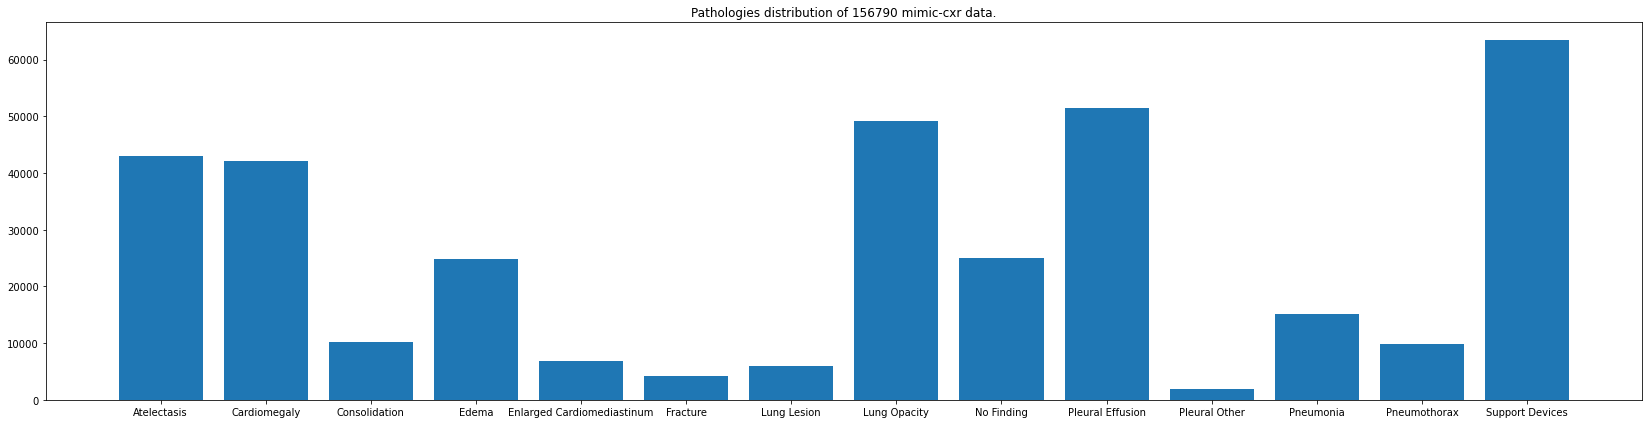

In [8]:
# look at the distribution of pathologies
f = lambda x: df_labels[x].sum()

path_types = df_labels.columns[2:16]
path_counts = [f(x) for x in path_types]

fig, ax = plt.subplots(1, 1, figsize = (23, 6))
plt.bar(path_types, path_counts)
ax.set_title(f"Pathologies distribution of {len(df_labels)} mimic-cxr data.")
plt.tight_layout();

In [9]:
df_labels.describe()

,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
count,156790.000000,156790.000000,156790.000000,156790.000000,156790.000000,156790.000000,156790.000000,156790.000000,156790.000000,156790.000000,156790.000000,156790.000000,156790.000000,156790.000000
mean,0.274826,0.268703,0.065406,0.158664,0.043294,0.026398,0.038434,0.313317,0.159187,0.328669,0.012258,0.096294,0.062644,0.404375
std,0.446428,0.443287,0.247242,0.365364,0.203518,0.160317,0.192241,0.463844,0.365852,0.469731,0.110037,0.294996,0.242323,0.490772
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

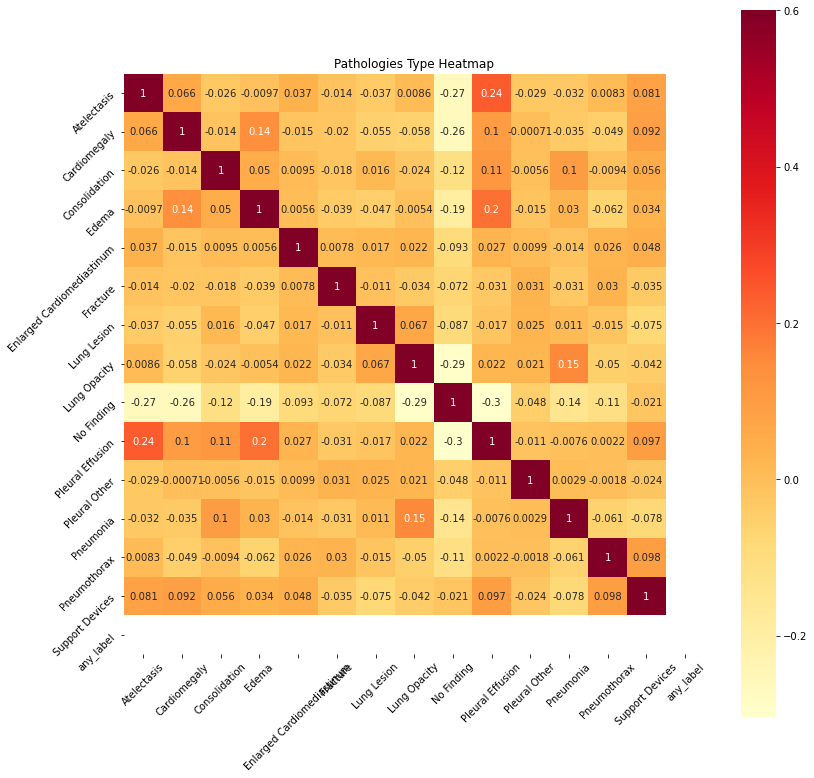

Pathologies Breakdown
=====

156790 out of 156790 pathology, or 100.00%, are classified as positive.

43090 Atelectasis pathology. (27.48% of all data.)
- 13618 or 31.60% were also Cardiomegaly.
- 2372 or 5.50% were also Consolidation.
- 6590 or 15.29% were also Edema.
- 2397 or 5.56% were also Enlarged Cardiomediastinum.
- 984 or 2.28% were also Fracture.
- 1152 or 2.67% were also Lung Lesion.
- 13779 or 31.98% were also Lung Opacity.
- 0 or 0.00% were also No Finding.
- 21969 or 50.98% were also Pleural Effusion.
- 308 or 0.71% were also Pleural Other.
- 3495 or 8.11% were also Pneumonia.
- 2840 or 6.59% were also Pneumothorax.
- 20219 or 46.92% were also Support Devices.
- 43090 or 100.00% were also any_label.

42130 Cardiomegaly pathology. (26.87% of all data.)
- 13618 or 32.32% were also Atelectasis.
- 2522 or 5.99% were also Consolidation.
- 10286 or 24.41% were also Edema.
- 1615 or 3.83% were also Enlarged Cardiomediastinum.
- 891 or 2.11% were also Fracture.
- 882 or 2.09% wer

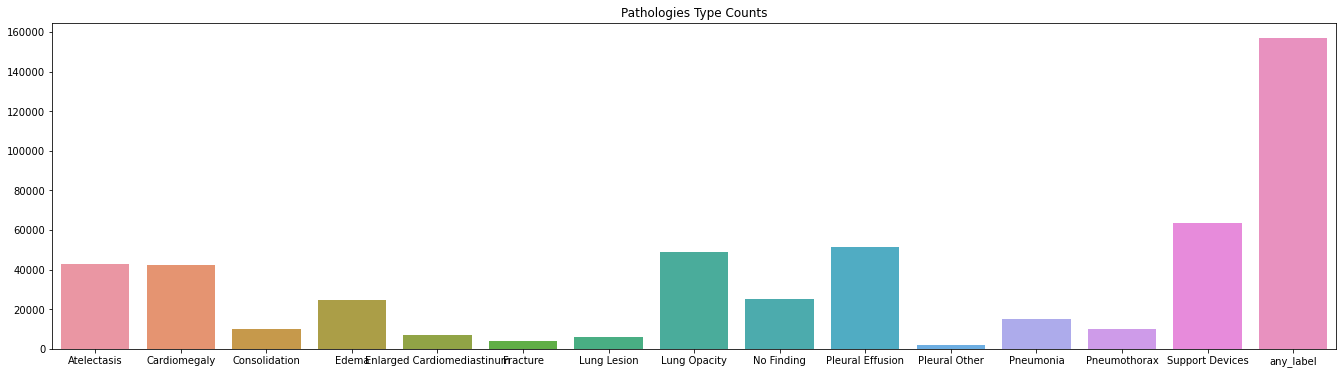

In [11]:
targets = list(df_labels.columns[2:16])
df_targets = df_labels[targets].copy()

# How many rows are postive? 
positive_rows = df_targets.sum(axis=1)
positive_rows = (positive_rows > 0)

# Create overall any_label feature
targets.append('any_label')
df_targets['any_label'] = positive_rows

count_dic = {}
for path_type in targets:
    counts = list()
    others = list(targets)
    df_selection = df_targets[(df_targets[path_type]==1)]
    others.remove(path_type)
    counts.append(('total', len(df_selection)))
    for other in others:
        counts.append((other, df_selection[other].sum()))
    count_dic[path_type] = counts


del(df_selection)

def heatmap(df_labels, title):
    plt.figure('heatmap', figsize=[13,13])
    plt.title(title)
    df_corr = df_labels.corr()
    sns.heatmap(df_corr, vmax=0.6, square=True, annot=True, cmap='YlOrRd')
    plt.yticks(rotation = 45)
    plt.xticks(rotation = 45)
    plt.show()

heatmap(df_targets, 'Pathologies Type Heatmap')


print('Pathologies Breakdown')
print('=====\n')

print('%d out of %d pathology, or %.2f%%, are classified as positive.' % 
     (np.sum(positive_rows), len(df_labels), (np.sum(positive_rows)/len(df_labels))*100))

totals = []
for key, value in count_dic.items():
    totals.append(value[0][1])
    print('\n%d %s pathology. (%.2f%% of all data.)' % (value[0][1], key, (value[0][1]/len(df_labels))*100))
    for cnt in value[1:]:
        print('- %d or %.2f%% were also %s.' % (cnt[1], (cnt[1]/value[0][1])*100, cnt[0]))
    

plt.figure('Pathologies Type Counts', figsize=[23,6])
plt.title('Pathologies Type Counts')
sns.barplot(x=list(count_dic.keys()), y=totals)
plt.show()

In [12]:
print(df_labels['Atelectasis'].value_counts())
print(df_labels['Cardiomegaly'].value_counts())
print(df_labels['Consolidation'].value_counts())
print(df_labels['Edema'].value_counts())
print(df_labels['Enlarged Cardiomediastinum'].value_counts())
print(df_labels['Fracture'].value_counts())
print(df_labels['Lung Lesion'].value_counts())
print(df_labels['Lung Opacity'].value_counts())
print(df_labels['No Finding'].value_counts())
print(df_labels['Pleural Effusion'].value_counts())
print(df_labels['Pleural Other'].value_counts())
print(df_labels['Pneumonia'].value_counts())
print(df_labels['Pneumothorax'].value_counts())
print(df_labels['Support Devices'].value_counts())
print(df_labels['is_valid'].value_counts())

0    113700
1     43090
Name: Atelectasis, dtype: int64
0    114660
1     42130
Name: Cardiomegaly, dtype: int64
0    146535
1     10255
Name: Consolidation, dtype: int64
0    131913
1     24877
Name: Edema, dtype: int64
0    150002
1      6788
Name: Enlarged Cardiomediastinum, dtype: int64
0    152651
1      4139
Name: Fracture, dtype: int64
0    150764
1      6026
Name: Lung Lesion, dtype: int64
0    107665
1     49125
Name: Lung Opacity, dtype: int64
0    131831
1     24959
Name: No Finding, dtype: int64
0    105258
1     51532
Name: Pleural Effusion, dtype: int64
0    154868
1      1922
Name: Pleural Other, dtype: int64
0    141692
1     15098
Name: Pneumonia, dtype: int64
0    146968
1      9822
Name: Pneumothorax, dtype: int64
0    93388
1    63402
Name: Support Devices, dtype: int64
False    152855
True       3935
Name: is_valid, dtype: int64


In [13]:
print(df_train['Atelectasis'].value_counts())
print(df_train['Cardiomegaly'].value_counts())
print(df_train['Consolidation'].value_counts())
print(df_train['Edema'].value_counts())
print(df_train['Enlarged Cardiomediastinum'].value_counts())
print(df_train['Fracture'].value_counts())
print(df_train['Lung Lesion'].value_counts())
print(df_train['Lung Opacity'].value_counts())
print(df_train['No Finding'].value_counts())
print(df_train['Pleural Effusion'].value_counts())
print(df_train['Pleural Other'].value_counts())
print(df_train['Pneumonia'].value_counts())
print(df_train['Pneumothorax'].value_counts())
print(df_train['Support Devices'].value_counts())
print(df_train['is_valid'].value_counts())

0    110803
1     42052
Name: Atelectasis, dtype: int64
0    111885
1     40970
Name: Cardiomegaly, dtype: int64
0    142893
1      9962
Name: Consolidation, dtype: int64
0    128820
1     24035
Name: Edema, dtype: int64
0    146266
1      6589
Name: Enlarged Cardiomediastinum, dtype: int64
0    148815
1      4040
Name: Fracture, dtype: int64
0    147012
1      5843
Name: Lung Lesion, dtype: int64
0    105098
1     47757
Name: Lung Opacity, dtype: int64
0    128368
1     24487
Name: No Finding, dtype: int64
0    102820
1     50035
Name: Pleural Effusion, dtype: int64
0    151004
1      1851
Name: Pleural Other, dtype: int64
0    138190
1     14665
Name: Pneumonia, dtype: int64
0    143211
1      9644
Name: Pneumothorax, dtype: int64
0    91087
1    61768
Name: Support Devices, dtype: int64
False    152855
Name: is_valid, dtype: int64


In [14]:
print(df_test['Atelectasis'].value_counts())
print(df_test['Cardiomegaly'].value_counts())
print(df_test['Consolidation'].value_counts())
print(df_test['Edema'].value_counts())
print(df_test['Enlarged Cardiomediastinum'].value_counts())
print(df_test['Fracture'].value_counts())
print(df_test['Lung Lesion'].value_counts())
print(df_test['Lung Opacity'].value_counts())
print(df_test['No Finding'].value_counts())
print(df_test['Pleural Effusion'].value_counts())
print(df_test['Pleural Other'].value_counts())
print(df_test['Pneumonia'].value_counts())
print(df_test['Pneumothorax'].value_counts())
print(df_test['Support Devices'].value_counts())
print(df_test['is_valid'].value_counts())

0    2897
1    1038
Name: Atelectasis, dtype: int64
0    2775
1    1160
Name: Cardiomegaly, dtype: int64
0    3642
1     293
Name: Consolidation, dtype: int64
0    3093
1     842
Name: Edema, dtype: int64
0    3736
1     199
Name: Enlarged Cardiomediastinum, dtype: int64
0    3836
1      99
Name: Fracture, dtype: int64
0    3752
1     183
Name: Lung Lesion, dtype: int64
0    2567
1    1368
Name: Lung Opacity, dtype: int64
0    3463
1     472
Name: No Finding, dtype: int64
0    2438
1    1497
Name: Pleural Effusion, dtype: int64
0    3864
1      71
Name: Pleural Other, dtype: int64
0    3502
1     433
Name: Pneumonia, dtype: int64
0    3757
1     178
Name: Pneumothorax, dtype: int64
0    2301
1    1634
Name: Support Devices, dtype: int64
True    3935
Name: is_valid, dtype: int64
